In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date

# Preparing the Data

In [2]:
# Import playlists
edm = pd.read_csv('/Users/winstonwang/Downloads/Datasets/elove.csv')
rap = pd.read_csv('/Users/winstonwang/Downloads/Datasets/rap.csv')
pop = pd.read_csv('/Users/winstonwang/Downloads/Datasets/chillvibes.csv')
rnb = pd.read_csv('/Users/winstonwang/Downloads/Datasets/nightdrives.csv')

# add a column 'playlist_name' to indicate the playlist the song is from
edm['playlist_name'] = 'EDM'
rap['playlist_name'] = 'Rap'
pop['playlist_name'] = 'Pop'
rnb['playlist_name'] = 'RnB'

# make lists of the DataFrames and the playlist names
playlists = [edm, rap, pop, rnb, all]
playlist_names = ['EDM','Rap','Pop', 'RnB', 'all']

In [3]:
# Combine the four playlists into one Dataframe and change the column type of added_date
all = pd.concat(playlists[:4], join='outer').drop_duplicates(keep=False)
all['release_date'] = pd.to_datetime(all['release_date'])
all['release_date'] = pd.to_datetime(all["release_date"].dt.strftime('%Y-%m-%d'))
all['added_date'] = pd.to_datetime(all['added_date'])
all['added_date'] = pd.to_datetime(all["added_date"].dt.strftime('%Y-%m-%d'))
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2637 entries, 0 to 706
Data columns (total 18 columns):
Unnamed: 0          2637 non-null int64
name                2634 non-null object
album               2634 non-null object
artist              2634 non-null object
release_date        2637 non-null datetime64[ns]
added_date          2637 non-null datetime64[ns]
length              2637 non-null int64
popularity          2637 non-null int64
danceability        2637 non-null float64
acousticness        2637 non-null float64
energy              2637 non-null float64
instrumentalness    2637 non-null float64
liveness            2637 non-null float64
loudness            2637 non-null float64
speechiness         2637 non-null float64
tempo               2637 non-null float64
valence             2637 non-null float64
playlist_name       2637 non-null object
dtypes: datetime64[ns](2), float64(9), int64(3), object(4)
memory usage: 391.4+ KB


In [26]:
all.head()

,name,album,artist,release_date,added_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,playlist_name,added_year,days_in_between,added_month
0,Don't Let Me Down (feat. Daya) - Illenium Remix,Don't Let Me Down (Remixes) (feat. Daya),The Chainsmokers,2016-05-27,2017-11-22,3.648883,66,0.428,0.0751,0.656,0.181000,0.1500,-3.712,0.0750,79.648,0.3550,EDM,2017,544,11
1,One Thing,One Thing,San Holo,2017-11-17,2017-11-22,3.894733,52,0.336,0.1360,0.746,0.000000,0.7370,-4.315,0.0685,151.756,0.2100,EDM,2017,5,11
2,In the Name of Love,In the Name of Love,Martin Garrix,2016-07-29,2017-11-22,3.261767,79,0.501,0.1090,0.519,0.000000,0.4540,-5.880,0.0409,133.990,0.1680,EDM,2017,481,11
3,Turn It Around,Turn It Around,neutral.,2017-09-15,2017-11-22,3.040800,0,0.742,0.0323,0.537,0.000158,0.0983,-8.336,0.0345,98.063,0.0606,EDM,2017,68,11
4,Wolves,Wolves,Selena Gomez,2017-10-25,2017-11-22,3.299883,80,0.724,0.1240,0.804,0.000000,0.2040,-4.614,0.0448,124.987,0.3060,EDM,2017,28,11


In [4]:
# Delete the unnecessary column
del all['Unnamed: 0']
all.head()

,name,album,artist,release_date,added_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,playlist_name
0,Don't Let Me Down (feat. Daya) - Illenium Remix,Don't Let Me Down (Remixes) (feat. Daya),The Chainsmokers,2016-05-27,2017-11-22,218933,66,0.428,0.0751,0.656,0.181000,0.1500,-3.712,0.0750,79.648,0.3550,EDM
1,One Thing,One Thing,San Holo,2017-11-17,2017-11-22,233684,52,0.336,0.1360,0.746,0.000000,0.7370,-4.315,0.0685,151.756,0.2100,EDM
2,In the Name of Love,In the Name of Love,Martin Garrix,2016-07-29,2017-11-22,195706,79,0.501,0.1090,0.519,0.000000,0.4540,-5.880,0.0409,133.990,0.1680,EDM
3,Turn It Around,Turn It Around,neutral.,2017-09-15,2017-11-22,182448,0,0.742,0.0323,0.537,0.000158,0.0983,-8.336,0.0345,98.063,0.0606,EDM
4,Wolves,Wolves,Selena Gomez,2017-10-25,2017-11-22,197993,80,0.724,0.1240,0.804,0.000000,0.2040,-4.614,0.0448,124.987,0.3060,EDM


In [5]:
# Convert the song length from milliseconds to minutes
edm['length'] = edm['length']/60000
rap['length'] = rap['length']/60000
pop['length'] = pop['length']/60000
rnb['length'] = rnb['length']/60000
all['length'] = all['length']/60000

In [6]:
all.describe()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000
mean,3.511279,50.461889,0.669172,0.245645,0.585156,0.016153,0.171211,-6.992534,0.139320,120.982146,0.388883
std,0.761348,25.342026,0.150800,0.245905,0.160084,0.091268,0.123369,2.507822,0.126609,28.342979,0.197145
min,1.341100,0.000000,0.173000,0.000031,0.031600,0.000000,0.027000,-20.930000,0.024200,39.497000,0.033800
25%,3.023933,41.000000,0.562000,0.047400,0.481000,0.000000,0.100000,-8.363000,0.047200,97.061000,0.236000
50%,3.450633,57.000000,0.680000,0.157000,0.590000,0.000000,0.122000,-6.706000,0.083500,122.699000,0.363000
75%,3.902350,68.000000,0.784000,0.384000,0.699000,0.000049,0.196000,-5.266000,0.199000,141.882000,0.523000
max,8.003100,100.000000,0.974000,0.978000,0.983000,0.954000,0.951000,-0.484000,0.855000,207.986000,0.962000


Text(0.5, 1, 'Correlation Between Song Features')

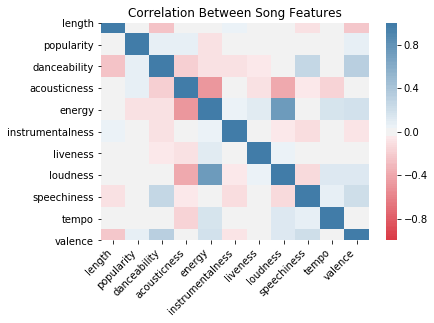

In [7]:
# Looks at the correlation between the features of the songs
corr = all.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(10, 240, n=100))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title("Correlation Between Song Features")

Interesting Findings:
 * energy & acousticness have a high negative correlation
 * loudness & energy have a high positive correlation
 * danceability & length have a negative correlation
 * instrumentalness and speechiness have a negative correlation, but not as high as I expected considering that, by definition, they are the exact opposite of each other

# Analyzing All My Music

Text(0.5, 1.0, 'Which Artists Have the Most Songs in My Playlists?')

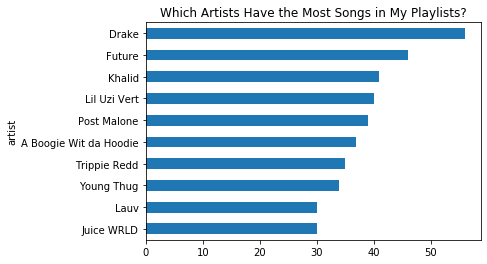

In [8]:
# Let's see which artists have the most songs in my main playlists
all.groupby(['artist'])['name'].count().sort_values().tail(10).plot(kind='barh')
plt.title('Which Artists Have the Most Songs in My Playlists?')

In [9]:
# I want to see what year I added songs from my top artists
all['added_year'] = all['added_date'].dt.year
amount_year = all.groupby(['artist', 'added_year']).count()['name'].reset_index().rename(columns={'name': 'amount'}).sort_values('amount', ascending=False)
top_10_artists = amount_year.groupby(['added_year']).head(10).artist.unique()
artist_years = amount_year[amount_year.artist.isin(top_10_artists)].pivot('artist', 'added_year', 'amount').fillna(0).sort_values('artist').head(50).style.background_gradient()
artist_years

added_year,2016,2017,2018,2019,2020
artist,,,,,
A Boogie Wit da Hoodie,0,5,6,9,17
Bazzi,0,0,5,6,14
Big Sean,6,5,0,2,0
Drake,6,7,14,21,8
Future,5,8,10,18,5
HONNE,0,1,9,2,9
ILLENIUM,0,6,8,11,0
Jeremy Zucker,0,1,7,1,10
Juice WRLD,0,0,8,13,9


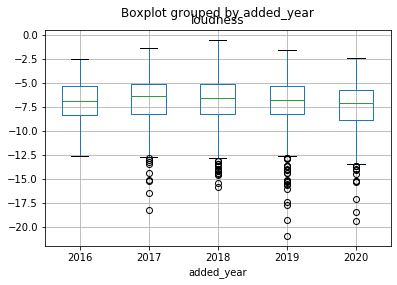

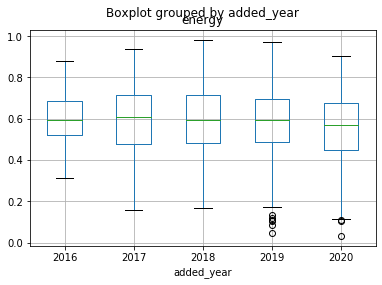

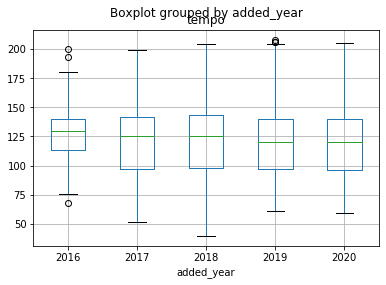

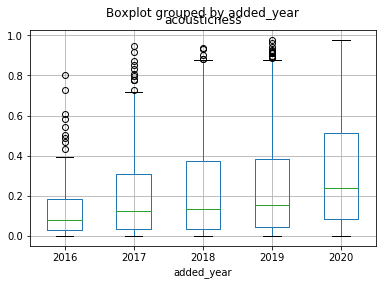

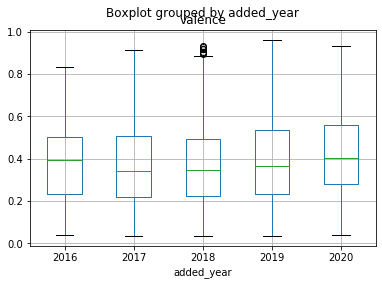

In [12]:
# How did my music taste change over the past four years?
all.boxplot('loudness', 'added_year')
all.boxplot('energy', 'added_year')
all.boxplot('tempo', 'added_year')
all.boxplot('acousticness', 'added_year')
all.boxplot('valence', 'added_year')

I want to see if my appetite for songs have changed based on loudness, energy, tempo, acousticness, and valence of the songs.

Because the first three features have positive relationships with each other, we see similar patterns in their box plots as well. Ever since 2017, my songs have been decreasing in loudness, energy, and tempo while increasing in acousticness. Because of COVID, there's a significant change in 2020 as the lockdown has undoubtedly changed my mood as I'm doing mostly indoor activities now, which I prefer doing with softer music.



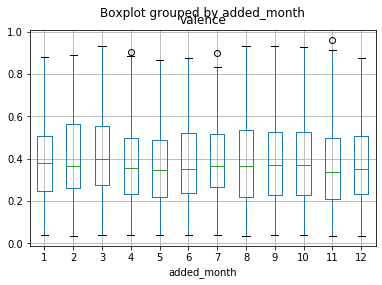

In [13]:
# Do I find different types of music during the colder and more depressing months? 
all['added_month'] = all['added_date'].dt.month
all.boxplot('valence', 'added_month')

Comparing the valence of my music and the month I added the music to my playlist, it seems that seasonality doesn't have too much effect on the type of music I enjoy. 

# Analyzing Playlists

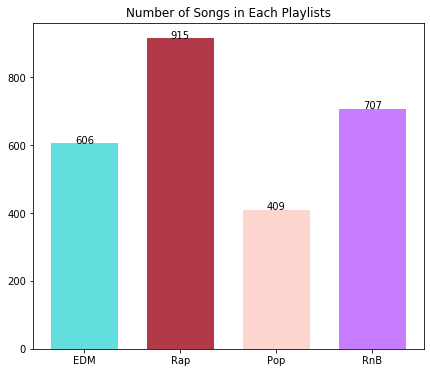

In [14]:
# Let's check how many songs each playlist has 
songs = [len(i) for i in playlists[:-1]]
x_pos = [i for i, _ in enumerate(playlists[:-1])]

plt.figure(figsize=(7,6))
plt.bar(x_pos, songs, color=('#64dfdf','#b23a48','#fcd5ce','#c77dff'), width=0.7)
plt.title('Number of Songs in Each Playlists')
plt.xticks(x_pos, playlist_names)
for i, v in enumerate(songs):
    plt.text(i - 0.1, v + 0.3, str(v))

<Figure size 432x288 with 0 Axes>

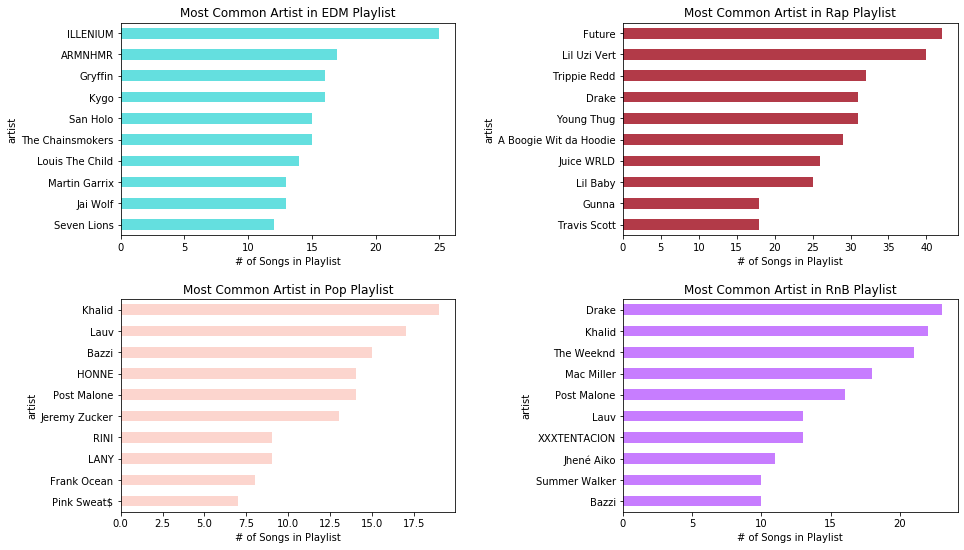

In [15]:
# Let's break down the most common artists in each playlists
plt.figure()
plt.figure(figsize=(15, 9))

colors = ['#64dfdf', '#b23a48', '#fcd5ce', '#c77dff']
name = ['ax', 'ax1', 'ax3', 'ax4']
for i in range(4):
    name[i] = plt.subplot(2,2,i+1)
    playlists[i].groupby(['artist'])['name'].count().sort_values().tail(10).plot(kind='barh', color = colors[i])
    plt.title('Most Common Artist in ' + str(playlist_names[i]) + ' Playlist')
    plt.xlabel('# of Songs in Playlist')
plt.subplots_adjust(wspace=0.5, hspace=0.3)

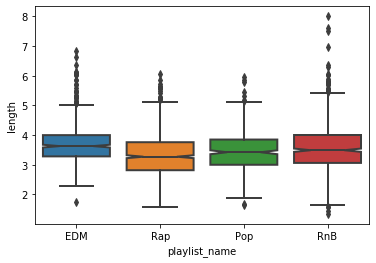

In [16]:
# Let's see the length of the songs and how they might differ between the four playlists
ax = sns.boxplot(x='playlist_name', y='length',data=all, notch=True, linewidth=2)

The median lies around 3.5 minutes in all four playlists. However, it's interesting that the EDM playlist has considerably more outliers and songs that are more than 5 minutes compared to the other three playlists. One explanation for this is that one of the most important parts of many EDM songs is the build-up. Having longer intros allow for a longer build-up that leads to a more anticipated beat drop. Longer intros and outros are also sometimes included to allow DJs to mix in tracks.

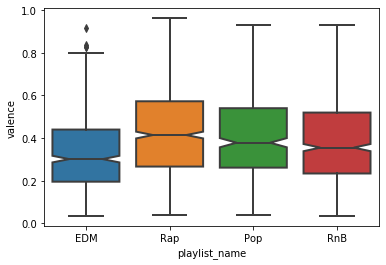

In [17]:
# Let's compare the valences of each playlists
ax = sns.boxplot(x='playlist_name', y='valence', data=all, notch='True', linewidth=2)

In [23]:
# Which EDM songs are the outliers?
edm[['name','artist','valence']].sort_values(['valence']).tail(5)

,name,artist,valence
237,The City (with Quinn XCII),Louis The Child,0.799
69,We Rise,San Holo,0.827
109,Lighthouse,Ookay,0.828
206,Tell Me,Marshmello,0.839
73,Love Is Alive,Louis The Child,0.915


In [25]:
# How up to date am I with new music?
# Calculate the time between the song's release date and added date
all = all.assign(days_in_between=all['added_date'] - all['release_date'])
all['days_in_between'] = all['days_in_between'].dt.days
new = pd.DataFrame(all.groupby(['playlist_name'])['days_in_between'].mean())
new.sort_values('days_in_between')

,days_in_between
playlist_name,
Rap,145.462295
RnB,428.149929
EDM,432.328383
Pop,658.239609


My rap playlist has a significant lower timeframe between the song's release date and the date I added it to my playlist. This could either be because I follow rap artists more closely than other genres or because I don't usually listen to old-school rap music. 

# Next Steps: Analyze albums, artists, & tracks

# Analyzing Albums & Artists

In [19]:
# I excluded artists that have less than 4 songs and calculated which artists make the longest and shortest tracks
length = all[all.groupby('artist').artist.transform('count') > 3]
length.groupby(['artist'])['length'].mean().sort_values(ascending=False)

artist
The 1975            5.016908
Porter Robinson     4.898340
Jaden               4.891008
Childish Gambino    4.602772
Mac Ayres           4.594972
                      ...   
Lil Mosey           2.555600
Lil Pump            2.548212
khai dreams         2.445833
XXXTENTACION        2.228499
Lil Tecca           2.088442
Name: length, Length: 199, dtype: float64

It's interesting to note that the 5 artists with the shortest average track lengths are all rappers and in my rap playlist.

In [20]:
album = all[all.groupby('album').album.transform('count') > 2]
length.groupby(['album'])['danceability'].mean().sort_values(ascending=False)

album
Baby                           0.970
Freaky                         0.966
Yes Indeed                     0.964
4REAL 4REAL                    0.960
Outstanding                    0.943
                               ...  
Shelter                        0.276
Pharmacy                       0.242
Moon River                     0.240
FAREWELL Ft. Aviella           0.223
Into My Heart (feat. GLNNA)    0.216
Name: danceability, Length: 1147, dtype: float64

In [21]:
album = all[all.groupby('album').album.transform('count') > 2]
length.groupby(['album'])['valence'].mean().sort_values(ascending=False)

album
AI YoungBoy 2                                    0.9620
Mood Swings                                      0.9300
Sunflower (Spider-Man: Into the Spider-Verse)    0.9270
Breathe                                          0.9200
Love Is Alive                                    0.9150
                                                  ...  
Rap Or Go To The League                          0.0379
In For It                                        0.0375
Aurora                                           0.0368
Someone to Drink With                            0.0361
All The Time                                     0.0338
Name: valence, Length: 1147, dtype: float64